In [82]:
# Imports
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

# Load data
data = pd.read_csv('data/animals.csv' )

# Get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


In [83]:
# Prepare data
clean_data = data.copy()

# Remove comments and ID
clean_data = clean_data.drop(columns=['Comments', 'Individual ID'])

# Drop columns that are all the same
clean_data = clean_data.drop(columns=['Stage', 'Region'])

# Fill in missing values
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mean.fit(clean_data)
clean_data[:] = imputer_mean.transform(clean_data)

# Standardize values
ss = StandardScaler()
ss.fit(clean_data)
clean_data[:] = ss.transform(clean_data)

# Make sure it is standardized
clean_data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02,3.440000e+02
mean,-1.156697e-15,4.131062e-16,-8.262125e-16,4.131062e-17,-8.881784e-16,-1.982910e-15
std,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00,1.001457e+00
min,-2.174858e+00,-2.060444e+00,-2.065333e+00,-1.880837e+00,-2.040713e+00,-1.713201e+00
25%,-8.548868e-01,-7.889322e-01,-7.796428e-01,-8.162745e-01,-7.894026e-01,-7.704987e-01
50%,6.035444e-02,7.569585e-02,-2.796522e-01,-1.900612e-01,-8.511148e-02,-1.380701e-01
75%,8.422188e-01,7.877425e-01,8.631834e-01,6.866374e-01,7.464484e-01,7.674839e-01
max,2.884265e+00,2.211836e+00,2.148873e+00,2.627899e+00,2.394446e+00,2.441526e+00


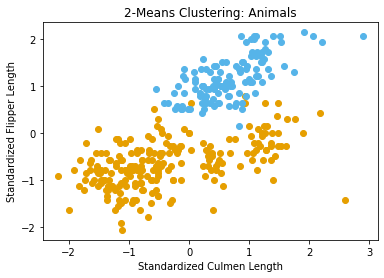

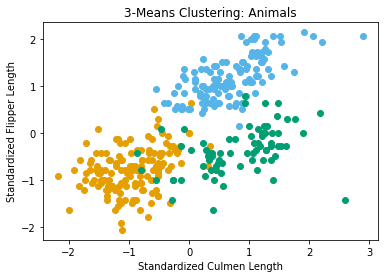

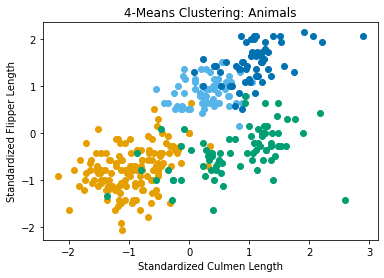

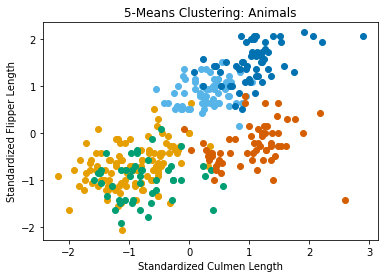

In [84]:
# Try clustering between 2 and 5
X = clean_data.copy()
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']
models = []
for k in range(2, 6):

     # Form algorithm
     kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

     # Get clusters
     clusters = kmeans.labels_

     # Separate data into clusters
     clustered_data = []
     for i in range(k):
          i_clusters = []
          for j in range(len(clusters)):
               if (i == clusters[j]):
                    i_clusters.append(j)
          clustered_data.append(X.iloc[i_clusters])

     # Form graphics
     fig, ax = plt.subplots()
     i = 0
     for this_cluster in clustered_data:
          ax.scatter(this_cluster['Culmen Length (mm)'], this_cluster['Flipper Length (mm)'], color=colors[i])
          i += 1
     ax.set_xlabel('Standardized Culmen Length')
     ax.set_ylabel('Standardized Flipper Length')
     ax.set_title(f'{k}-Means Clustering: Animals')

     # Save model
     models.append(kmeans)

Text(0.5, 1.0, 'k-Means Clustering: Scree')

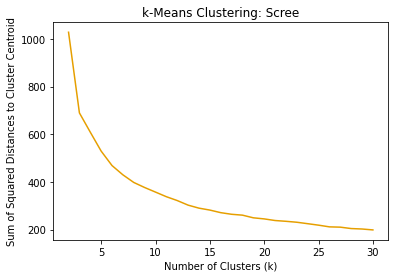

In [85]:
# Create models 6 through 30 (increased from 9)
for k in range(6, 31):
    
    # Form algorithm
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # Save model
    models.append(kmeans)

# Get inertia for each model
inertia = []
for model in models:
    inertia.append(model.inertia_)

fig, ax = plt.subplots()
ks = range(2, 31)
ax.plot(ks, inertia, color=colors[0])
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of Squared Distances to Cluster Centroid')
ax.set_title(f'k-Means Clustering: Scree')